In [112]:
##Importing libaries
import os
import plotly.graph_objs as go  # Offline plotting
import chart_studio.plotly as py  # Online plotting
import chart_studio
import plotly.io as pio
import pandas as pd
import datetime
import calendar
import textwrap

##Importing environment variables with dotenv
from dotenv import load_dotenv, find_dotenv
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

##Adding plot.ly credentials
chart_studio.tools.set_credentials_file(
    username=os.getenv("PLOTLY_USERNAME"), api_key=os.getenv("PLOTLY_API_KEY")
)

##Loading and setting templates
pio.templates
prt_template = go.layout.Template(
    layout=go.Layout(
        title_font=dict(family="Helvetica Neue, Arial", size=17),
        font_color="#54565B",
        font_family="Helvetica Neue, Arial",
        font_size=12,
        paper_bgcolor="#FBFAF7",
        plot_bgcolor="#FBFAF7",
        colorway=("#A01D28", "#499CC9", "#F9A237", "#6FBA3A", "#573D6B"),
    )
)

config = dict(
    {
        "scrollZoom": False,
        "displayModeBar": False,
        "editable": False,
        "displaylogo": False,
        "showAxisDragHandles": False,
    }
)

##Reading in data
df = pd.read_csv(
    "../Data/prison_population.csv",
    usecols=["date", "population"],
    parse_dates=["date"],
)

In [ ]:
df["year"] = df.index.year
df["week"] = df.index.isocalendar().week
df["month"] = df.index.month

df["month"] = df["month"].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df

In [ ]:
df["date"].dt.month

In [ ]:
df["month"] = df["date"].dt.month

In [ ]:
df

In [ ]:
df["month"] = df["month"].apply(lambda x: calendar.month_abbr[x])

In [ ]:
df

In [ ]:
weeks = 52 / 12.0
months = [datetime.date(2021, m, 1).strftime("%b") for m in range(1, 13)]

In [2]:
year = "2018"
mask = df['date'].dt.year >= int(year)
df_include = df[mask]
df_include

,date,population
209,2018-01-05,84226.0
210,2018-01-12,84304.0
211,2018-01-19,84204.0
212,2018-01-26,84157.0
213,2018-02-02,84131.0
...,...,...
412,2021-12-17,79446.0
413,2021-12-24,79249.0
414,2021-12-31,79092.0
415,2022-01-07,79086.0


In [3]:
for year in df_include["date"].dt.year.unique():
    print(year)

2018
2019
2020
2021
2022


In [4]:
for year in df_include["date"].dt.year.unique():
    df_year = df_include[df_include["date"].dt.year == year]
    print(df_year.head())

          date  population
209 2018-01-05     84226.0
210 2018-01-12     84304.0
211 2018-01-19     84204.0
212 2018-01-26     84157.0
213 2018-02-02     84131.0
          date  population
261 2019-01-04     81980.0
262 2019-01-11     82107.0
263 2019-01-18     82240.0
264 2019-01-25     82233.0
265 2019-02-01     82254.0
          date  population
313 2020-01-03     82559.0
314 2020-01-10     82732.0
315 2020-01-17     82932.0
316 2020-01-24     82947.0
317 2020-01-31     83077.0
          date  population
363 2021-01-08     77930.0
364 2021-01-15     77942.0
365 2021-01-22     77955.0
366 2021-01-29     77976.0
367 2021-02-05     78024.0
          date  population
415 2022-01-07     79086.0
416 2022-01-14     79193.0


In [ ]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 31)

index = pd.date_range(start, end)



In [74]:
filt = index.is_month_start
index[filt]

DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01'],
              dtype='datetime64[ns]', freq=None)

In [79]:
index[filt].strftime('%G-W%V-%u')

Index(['2020-W53-5', '2021-W05-1', '2021-W09-1', '2021-W13-4', '2021-W17-6',
       '2021-W22-2', '2021-W26-4', '2021-W30-7', '2021-W35-3', '2021-W39-5',
       '2021-W44-1', '2021-W48-3'],
      dtype='object')

In [ ]:
%G-W%V-%u

In [76]:
month_weeks = index[filt].isocalendar().week
month_weeks[0] = 1
month_weeks

2021-01-01     1
2021-02-01     5
2021-03-01     9
2021-04-01    13
2021-05-01    17
2021-06-01    22
2021-07-01    26
2021-08-01    30
2021-09-01    35
2021-10-01    39
2021-11-01    44
2021-12-01    48
Name: week, dtype: UInt32

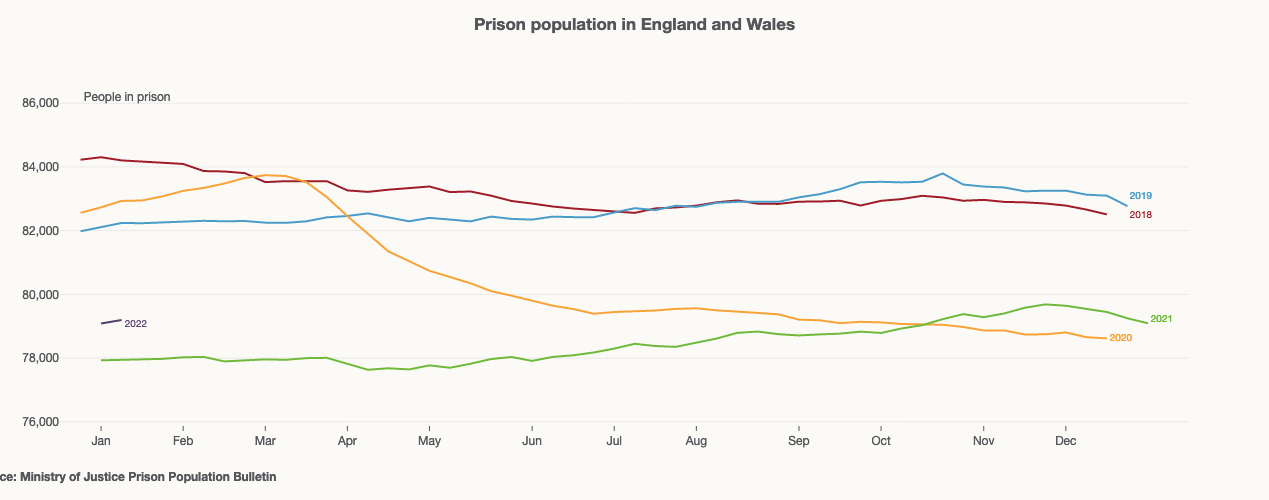

In [114]:
## Chart title
title = textwrap.wrap("<b>Prison population in England and Wales</b>", width=65)

##Plotting

fig = go.Figure()

trace_list = []
for year in df_include["date"].dt.year.unique():
    df_year = df_include[df_include["date"].dt.year == year]
    
    trace = go.Scatter(
#         x=df_year["date"].dt.isocalendar().week,
        x=df_year["date"].dt.strftime("Week %U"),
#         x=df_year["date"],
        y=df_year["population"],
        mode="lines",
        connectgaps=True,
        hovertext=df["date"].dt.strftime(" "),
        hovertemplate="<b>%{hovertext}</b><br>" + "%{y:,.0f}",
        name=str(year),
    )
    
    trace_list.append(trace)

fig.add_traces(trace_list)


##Edit the layout

fig.update_layout(
    margin=dict(l=60, b=75),
    title="<br>".join(title),
    title_y=0.94,
    title_yanchor="bottom",    
    yaxis_title="",
    yaxis_tickformat=",.0f",
    xaxis_showgrid=False,
    xaxis_tickvals=month_weeks,
    xaxis_ticktext=index[filt].strftime("%b"),
    xaxis_tickcolor="#54565B",
    template=prt_template,
    showlegend=False,
    hovermode="x unified",
    modebar_activecolor="#A12833",
    width=655,
    height=500,
)

## Chart annotations
annotations = []

# Adding trace annotations
for i in range(0, len(trace_list)):
    annotations.append(
        dict(
            xref="x",
            yref="y",
            x=trace_list[i].x[-1],
            y=trace_list[i].y[-2],
            text=str(trace_list[i].name),
            xanchor="left",
            align="left",
            showarrow=False,
            font_color=prt_template.layout.colorway[i],
            font_size=10,
        )
    )
    
# Adding source label
annotations.append(
    dict(
        xref="paper",
        yref="paper",
        x=-0.08,
        y=-0.19,
        align="left",
        showarrow=False,
        text="<b>Source: Ministry of Justice Prison Population Bulletin</b>",
        font_size=12,
    )
)

# Adding y-axis label
annotations.append(
    dict(
        xref="x",
        yref="paper",
        x="Week 00",
        y=1.04,
        align="left",
        xanchor="left",
        showarrow=False,
        text="People in prison",
        font_size=12,
    )
)

# Adding annotations to layout
fig.update_layout(annotations=annotations)

fig.update_yaxes(range=[75900, 86100], nticks=6)
fig.update_xaxes(range=[-1, 54])

##Plot file offline
fig.show(config=config)

In [91]:
df_year["date"].dt.strftime("Week %W")

415    Week 01
416    Week 02
Name: date, dtype: object

In [115]:
trace_list

[Scatter({
     'connectgaps': True,
     'hovertemplate': '<b>%{hovertext}</b><br>%{y:,.0f}',
     'hovertext': array([' ', ' ', ' ', ..., ' ', ' ', ' '], dtype=object),
     'mode': 'lines',
     'name': '2018',
     'x': array(['Week 00', 'Week 01', 'Week 02', 'Week 03', 'Week 04', 'Week 05',
                 'Week 06', 'Week 07', 'Week 08', 'Week 09', 'Week 10', 'Week 11',
                 'Week 12', 'Week 13', 'Week 14', 'Week 15', 'Week 16', 'Week 17',
                 'Week 18', 'Week 19', 'Week 20', 'Week 21', 'Week 22', 'Week 23',
                 'Week 24', 'Week 25', 'Week 26', 'Week 27', 'Week 28', 'Week 29',
                 'Week 30', 'Week 31', 'Week 32', 'Week 33', 'Week 34', 'Week 35',
                 'Week 36', 'Week 37', 'Week 38', 'Week 39', 'Week 40', 'Week 41',
                 'Week 42', 'Week 43', 'Week 44', 'Week 45', 'Week 46', 'Week 47',
                 'Week 48', 'Week 49', 'Week 50', 'Week 51'], dtype=object),
     'y': array([84226., 84304., 84204., 8415

In [20]:
weeks= 52/12
xaxis_tickvals=[(2 * k - 1) * weeks / 2 for k in range(1, 13)]
xaxis_tickvals

[2.1666666666666665,
 6.5,
 10.833333333333332,
 15.166666666666666,
 19.5,
 23.833333333333332,
 28.166666666666664,
 32.5,
 36.83333333333333,
 41.166666666666664,
 45.5,
 49.83333333333333]

In [25]:
xaxis_tickvals=[df["date"].dt.month.unique()]
xaxis_tickvals

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])]

In [13]:
s = pd.Series(pd.date_range("2018-02-27", periods=3))

In [16]:
filt = s.dt.is_month_start
s[filt].dt.isocalendar().week

2    9
Name: week, dtype: UInt32

In [26]:
filt = df_year['date'].dt.is_month_start
df_year[filt]['date'].dt.isocalendar().week

230    22
Name: week, dtype: UInt32

In [35]:
rng = pd.date_range('2015-02-24', periods=5, freq='D')
rng

DatetimeIndex(['2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27',
               '2015-02-28'],
              dtype='datetime64[ns]', freq='D')

In [46]:
start = datetime.datetime(2021, 1, 1)
end = datetime.datetime(2021, 12, 31)

index = pd.date_range(start, end)
index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [6]:
fig.data

(Scatter({
     'connectgaps': True,
     'hovertemplate': '<b>%{hovertext}</b><br>%{y:,.0f}',
     'hovertext': array([ 1.,  1.,  1., ..., 12.,  1.,  1.]),
     'mode': 'lines',
     'name': '2018',
     'x': array([[2018, 1, 5],
                 [2018, 2, 5],
                 [2018, 3, 5],
                 [2018, 4, 5],
                 [2018, 5, 5],
                 [2018, 6, 5],
                 [2018, 7, 5],
                 [2018, 8, 5],
                 [2018, 9, 5],
                 [2018, 10, 5],
                 [2018, 11, 5],
                 [2018, 12, 5],
                 [2018, 13, 5],
                 [2018, 14, 5],
                 [2018, 15, 5],
                 [2018, 16, 5],
                 [2018, 17, 5],
                 [2018, 18, 5],
                 [2018, 19, 5],
                 [2018, 20, 5],
                 [2018, 21, 5],
                 [2018, 22, 5],
                 [2018, 23, 5],
                 [2018, 24, 5],
                 [2018, 25, 5],
         

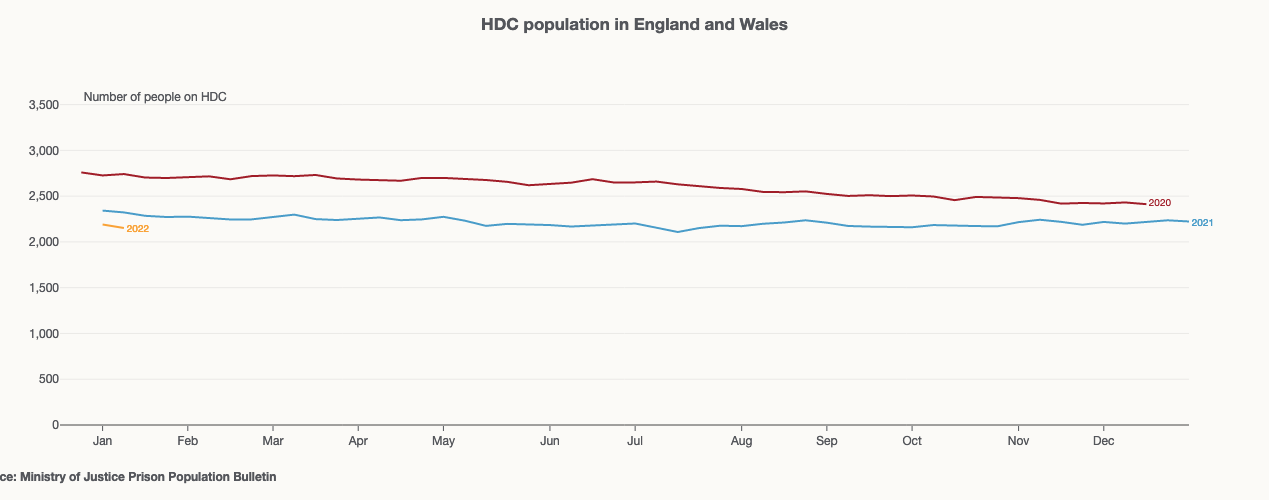

In [205]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 17 11:51:09 2022

@author: alex
"""

##Importing libaries
import os
import plotly.graph_objs as go  # Offline plotting
import chart_studio.plotly as py  # Online plotting
import chart_studio
import plotly.io as pio
import pandas as pd
import datetime
import textwrap

##Importing environment variables with dotenv
from dotenv import load_dotenv, find_dotenv
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

##Adding plot.ly credentials
chart_studio.tools.set_credentials_file(
    username=os.getenv("PLOTLY_USERNAME"), api_key=os.getenv("PLOTLY_API_KEY")
)

##Loading and setting templates
pio.templates
prt_template = go.layout.Template(
    layout=go.Layout(
        title_font=dict(family="Helvetica Neue, Arial", size=17),
        font_color="#54565B",
        font_family="Helvetica Neue, Arial",
        font_size=12,
        paper_bgcolor="#FBFAF7",
        plot_bgcolor="#FBFAF7",
        colorway=("#A01D28", "#499CC9", "#F9A237", "#6FBA3A", "#573D6B"),
    )
)

config = dict(
    {
        "scrollZoom": False,
        "displayModeBar": False,
        "editable": False,
        "displaylogo": False,
        "showAxisDragHandles": False,
    }
)

##Reading in data
df = pd.read_csv(
    "../Data/HDC.csv",
    usecols=["date", "hdc_pop"],
    parse_dates=["date"],
    thousands=","
)

##Filtering year range
year = "2020"
mask = df['date'].dt.year >= int(year)
df_include = df[mask]

##Calculating xaxis_tickvals
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)

xtick_vals = pd.date_range(start, end)
filt = xtick_vals.is_month_start

month_weeks = xtick_vals[filt].isocalendar().week
month_weeks[0] = 1 #preventing week 1 from starting at the end of previous year

## Chart title
title = textwrap.wrap("<b>HDC population in England and Wales</b>", width=65)

##Plotting

fig = go.Figure()

trace_list = []
for year in df_include["date"].dt.year.unique():
    df_year = df_include[df_include["date"].dt.year == year]
    
    trace = go.Scatter(
        x=df_year["date"].dt.strftime("Week %U"),
        y=df_year["hdc_pop"],
        mode="lines",
        connectgaps=True,
        hovertext=df["date"].dt.strftime(" "),
        hovertemplate="<b>%{hovertext}</b><br>" + "%{y:,.0f}",
        name=str(year),
    )
    
    trace_list.append(trace)

fig.add_traces(trace_list)


##Edit the layout

fig.update_layout(
    margin=dict(l=60, b=75),
    title="<br>".join(title),
    title_y=0.94,
    title_yanchor="bottom",    
    yaxis_title="",
    yaxis_tickformat=",.0f",
    xaxis_showgrid=False,
    xaxis_tickvals=month_weeks,
    xaxis_ticktext=xtick_vals[filt].strftime("%b"),
    xaxis_tickcolor="#54565B",
    template=prt_template,
    showlegend=False,
    hovermode="x unified",
    modebar_activecolor="#A12833",
    width=655,
    height=500,
)

## Chart annotations
annotations = []

y_list=[0,-25,-45,0,0]

# Adding trace annotations
for i in range(0, len(trace_list)):
    annotations.append(
        dict(
            xref="x",
            yref="y",
            x=trace_list[i].x[-1],
            y=trace_list[i].y[-2] + y_list[i],
            text=str(trace_list[i].name),
            xanchor="left",
            align="left",
            showarrow=False,
            font_color=prt_template.layout.colorway[i],
            font_size=10,
        )
    )
    
# Adding source label
annotations.append(
    dict(
        xref="paper",
        yref="paper",
        x=-0.08,
        y=-0.19,
        align="left",
        showarrow=False,
        text="<b>Source: Ministry of Justice Prison Population Bulletin</b>",
        font_size=12,
    )
)

# Adding y-axis label
annotations.append(
    dict(
        xref="x",
        yref="paper",
        x="Week 00",
        y=1.04,
        align="left",
        xanchor="left",
        showarrow=False,
        text="Number of people on HDC",
        font_size=12,
    )
)

# Adding annotations to layout
fig.update_layout(annotations=annotations)

fig.update_yaxes(range=[0, 3550], nticks=10)
fig.update_xaxes(range=[-1, 52])

##Plot file offline
fig.show(config=config)